In [1]:
import numpy as np
from analyze_stability import * 
from scipy import linalg
import math as m


### Parameter Setting:

#### Generator Parameter Setting
- $ T_{v} $ = Time constant of valve
- $ T_{e} $ = Time constant of engine
- $ H $ = Inertia Constant
- $ D $ = Fractional Constant

- $ M $ = $ 2\sum_i H_{i}$ 


In [2]:
Ts = 0.5*10**-4
wpu = 1.0;
Wmax = 1.02;

# Generator Parameter
Pgen = np.array([1, 1, 1])
droop = 0.05
Tv = np.array([0.5, 1.0, 1.0])
Te = np.array([0.05, 0.1, 0.1])
H = np.array([1.587, 2.5, 2.5])
D = 0.01
gen_dict = {'Sbase':150, 'Pgen':Pgen, 'droop':droop,
            'Tv':Tv, 'Te':Te, 'H':H, 'D':D}

# Control Parameter
con_dict = {'kp1': 8,
            'ki1': 2.5,
            'ki2': 5,
            'kc1' : 0.1,
            'Tl1' : 2.4
           }


### Generate System Matrix

In [3]:
# Ngen  number of generator
# Nval  number of variables for one generator
Ts = 0.5*10**-4
error_mat = np.array([0.0001, 0, -0.0001])
scenario = 'droop'
case_dict = {'Ngen':2, 'Nval': cal_Nvariable(scenario), 'Ts': 0.5*10**-4, 'Ttotal': 200,
            'wpu':1.0, 'Wmax': 1.02, 'error': error_mat}

A = generate_Amat(gen_dict, con_dict, case_dict, 'droop')
B = generate_Bmat(gen_dict, con_dict, case_dict)

### Analyze Eigen Value

In [4]:
eig,left_eig_v,right_eig_v = linalg.eig(A, left= True, right = True)

(-3.0, 3.0)

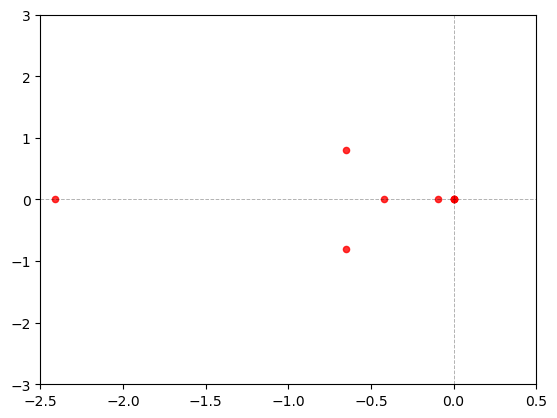

In [5]:
import matplotlib.pyplot as plt
plt.axvline(x=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')
plt.axhline(y=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')
x = eig.real
y = eig.imag
plt.scatter(x,y, s = 20, c = 'r', alpha = 0.8)
plt.xlim([-2.5, 0.5])
plt.ylim([ -3, 3])


### SDP for Lyapunov Function

In [4]:
import cvxpy as cp
import tabulate

### Inital Case
 ### case 1
 ### Minimize(0), A_T@P + P@A << 0
 

Matrix is symmetric
Eigen Value of P 
minimum eigenvalue of P: 0.001980214915008067
maximum eigenvalue of P: 6.079007761775459


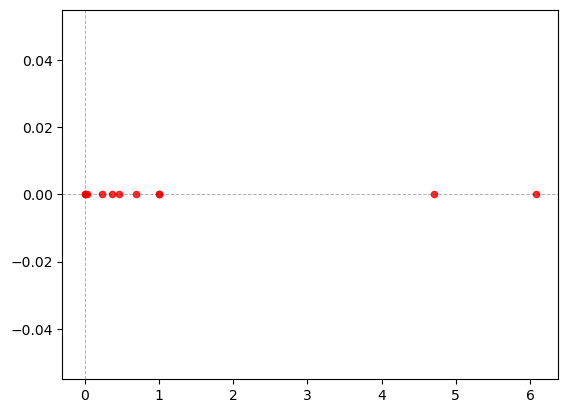

In [14]:
n = A.shape[0]

# Define the LMI variables
P = cp.Variable((n,n), symmetric = True)
gamma = 1.0
Q = np.eye(n)* gamma
# Define the constraints for the LMI
#constraints = [P >>0, A.T @ P + P@A + Q << 0]
constraints = [P >>0, A.T @ P + P@A << 0]

# Define the objective for the LMI optimization problem
#obj = cp.Minimize(cp.trace(P))
obj = cp.Minimize(0)

# Solve the LMI optimization problem
prob = cp.Problem(obj, constraints)

# Create a SolverOptions object and set the tolerance to 1e-6
# Solve the problem with the specified options

#prob.solve(solver=cp.MOSEK, verbose=True) #, options=options)
prob.solve(solver=cp.MOSEK)

P_value = np.round(P.value, decimals=5)
eig,left_eig_v,right_eig_v = linalg.eig(P_value, left= True, right = True)
check_symmetric(P_value)

eig, eig_vec = linalg.eig(P_value)
print("Eigen Value of P ")
plt.axvline(x=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')
plt.axhline(y=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')

x = eig.real
y = eig.imag

print("minimum eigenvalue of P:", min(x))
print("maximum eigenvalue of P:", max(x))


plt.scatter(x,y, s = 20, c = 'r', alpha = 0.8)



In [15]:
table = tabulate.tabulate(P.value, tablefmt='html')
print("symmetric P Table")
table

symmetric P Table


3.58068,0.524276,0.524154,-0.00130616,-1.95495,-1.2971e-19,0.524269,0.332946,0.0176644,-1.63099,0
0.524276,0.212789,0.121803,0.00123757,-0.243465,-2.56841e-17,0.209278,0.06594,0.00964039,-0.232163,0
0.524154,0.121803,0.534979,0.00545002,-0.701958,-3.6781e-20,0.121806,-0.0620491,0.0105188,0.176585,0
-0.00130616,0.00123757,0.00545002,0.00833405,-0.00283008,1.3823e-21,0.00123749,0.000457329,-0.00546586,0.00412387,0
-1.95495,-0.243465,-0.701958,-0.00283008,3.84895,-5.14395e-16,-0.313393,0.328716,-0.00664771,-0.876054,0
-1.2971e-19,-2.56841e-17,-3.6781e-20,1.3823e-21,-5.14395e-16,1,6.17208e-18,-2.21363e-20,-1.071e-20,1.22068e-16,0
0.524269,0.209278,0.121806,0.00123749,-0.313393,6.17208e-18,0.212781,0.0659373,0.00964069,-0.162441,0
0.332946,0.06594,-0.0620491,0.000457329,0.328716,-2.21363e-20,0.0659373,0.629002,0.0173146,-0.662325,0
0.0176644,0.00964039,0.0105188,-0.00546586,-0.00664771,-1.071e-20,0.00964069,0.0173146,0.0341162,-0.011113,0
-1.63099,-0.232163,0.176585,0.00412387,-0.876054,1.22068e-16,-0.162441,-0.662325,-0.011113,3.51991,0
0,0,0,0,0,0,0,0,0,0,1


In [18]:
Q = A.T@P.value + P.value@A
table1 = tabulate.tabulate(Q, tablefmt='html')
print("symmetric A.T@P+P@A Table")
table1

symmetric A.T@P+P@A Table


-0.62591,-0.16802,-0.111237,-0.142176,0.318977,1.29304e-19,-0.16802,-0.119172,-0.166951,0.308612,0
-0.16802,-0.0976129,-0.000812788,-0.074767,0.0844742,2.16148e-20,-0.0976134,-0.00505885,-0.113169,0.0845204,0
-0.111237,-0.000812788,-0.296599,-0.0502494,0.267573,-4.17916e-20,-0.000822365,-0.0103916,0.138305,-0.156329,0
-0.142176,-0.074767,-0.0502494,-0.355798,0.193709,-6.71917e-20,-0.0747621,0.00544293,0.191349,-0.0507866,0
0.318977,0.0844742,0.267573,0.193709,-0.566016,1.3823e-19,0.0844665,-0.13079,-0.144745,0.246195,0
1.29304e-19,2.16148e-20,-4.17916e-20,-6.71917e-20,1.3823e-19,0,2.16148e-20,2.18607e-19,9.56738e-20,-2.6775e-19,0
-0.16802,-0.0976134,-0.000822365,-0.0747621,0.0844665,2.16148e-20,-0.0976139,-0.00504653,-0.113175,0.084528,0
-0.119172,-0.00505885,-0.0103916,0.00544293,-0.13079,2.18607e-19,-0.00504653,-0.286703,-0.0288903,0.250012,0
-0.166951,-0.113169,0.138305,0.191349,-0.144745,9.56738e-20,-0.113175,-0.0288903,-0.715928,0.312825,0
0.308612,0.0845204,-0.156329,-0.0507866,0.246195,-2.6775e-19,0.084528,0.250012,0.312825,-0.555652,0
0,0,0,0,0,0,0,0,0,0,0


In [19]:
A.T[6,:]@P[]

array([  0.07590709,   0.        ,   0.        , -24.29026871,
         0.        ,   0.        ,   0.        ,   0.        ,
        -6.07256718,   0.        ,   0.        ])

Simulation Time: 60.8944308757782 secs
Draw the Frequency Plot
Draw the Active Power Plot


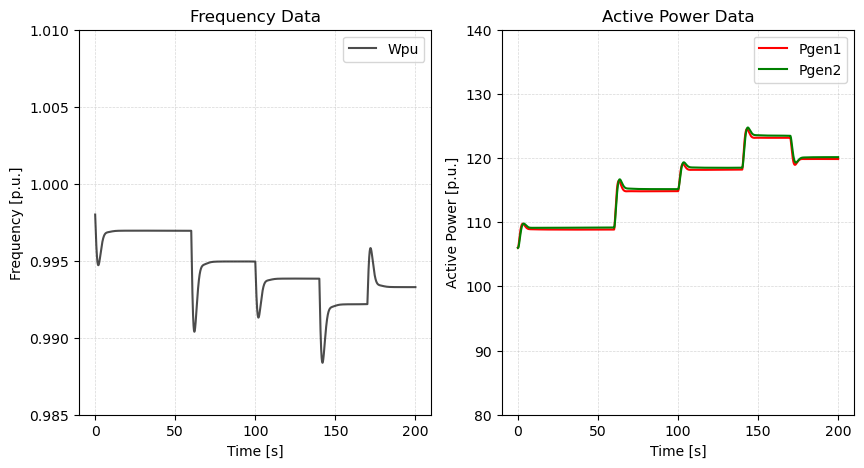

In [9]:
X_droop, U1, U2 = run_timeseries(gen_dict, con_dict, case_dict, 'droop')

#Update Plot
draw_graph(X_droop, gen_dict, case_dict, scenario)

### Case 2
### Minimize(cp.trace(P)), , A_T@P + P@A << 0

Matrix is symmetric
Eigen Value of P 
minimum eigenvalue of P: 0.0
maximum eigenvalue of P: 0.0


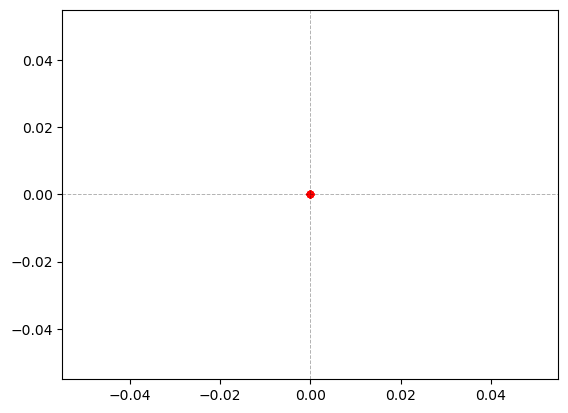

In [10]:
n = A.shape[0]

# Define the LMI variables
P = cp.Variable((n,n), symmetric = True)
gamma = 1.0
Q = np.eye(n)* gamma
# Define the constraints for the LMI
#constraints = [P >>0, A.T @ P + P@A + Q << 0]
constraints = [P >>0, A.T @ P + P@A << 0]

# Define the objective for the LMI optimization problem
#obj = cp.Minimize(cp.trace(P))
obj = cp.Minimize(cp.trace(P))

# Solve the LMI optimization problem
prob = cp.Problem(obj, constraints)

# Create a SolverOptions object and set the tolerance to 1e-6
# Solve the problem with the specified options

#prob.solve(solver=cp.MOSEK, verbose=True) #, options=options)
prob.solve(solver=cp.MOSEK)

P_value = np.round(P.value, decimals=5)
eig,left_eig_v,right_eig_v = linalg.eig(P_value, left= True, right = True)
check_symmetric(P_value)

eig, eig_vec = linalg.eig(P_value)
print("Eigen Value of P ")
plt.axvline(x=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')
plt.axhline(y=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')

x = eig.real
y = eig.imag

print("minimum eigenvalue of P:", min(x))
print("maximum eigenvalue of P:", max(x))


plt.scatter(x,y, s = 20, c = 'r', alpha = 0.8)



In [11]:
table = tabulate.tabulate(P_value, tablefmt='html')
print("symmetric P Table")
table

symmetric P Table


0,0,0,0,-0,-0,0,0,0,-0,0
0,-0,0,0,-0,0,0,0,0,-0,0
0,0,0,0,-0,0,0,-0,0,-0,0
0,0,0,0,-0,0,0,0,0,-0,0
-0,-0,-0,-0,0,0,-0,-0,-0,0,0
-0,0,0,0,0,-0,-0,0,0,0,0
0,0,0,0,-0,-0,-0,-0,0,-0,0
0,0,-0,0,-0,0,-0,-0,0,-0,0
0,0,0,0,-0,0,0,0,0,-0,0
-0,-0,-0,-0,0,0,-0,-0,-0,-0,0
0,0,0,0,0,0,0,0,0,0,-0


In [13]:
Q = A.T@P_value + P_value@A
table1 = tabulate.tabulate(Q, tablefmt='html')
print("symmetric P Table")
table1

symmetric P Table


0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0


### Case 3
### Minimize(cp.trace(P)), , A_T@P + P@A + Q << 0
#### Q -> cp variable

Matrix is symmetric
Matrix is symmetric
Eigen Value of P 
minimum eigenvalue of P: 0.0
maximum eigenvalue of P: 0.0


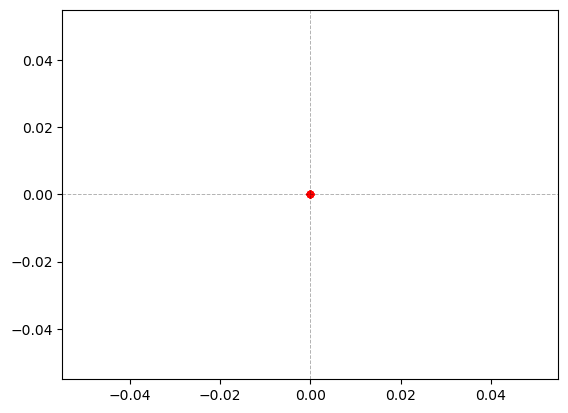

In [22]:
n = A.shape[0]

# Define the LMI variables
P = cp.Variable((n,n), symmetric = True)
gamma = 1.0
Q = cp.Variable((n,n), symmetric = True)

# Define the constraints for the LMI
#constraints = [P >>0, A.T @ P + P@A + Q << 0]
constraints = [P >>0, Q >>0, A.T @ P + P@A + Q << 0]

# Define the objective for the LMI optimization problem
#obj = cp.Minimize(cp.trace(P))
obj = cp.Minimize(cp.trace(P))

# Solve the LMI optimization problem
prob = cp.Problem(obj, constraints)

# Create a SolverOptions object and set the tolerance to 1e-6
# Solve the problem with the specified options

#prob.solve(solver=cp.MOSEK, verbose=True) #, options=options)
prob.solve(solver=cp.MOSEK)

P_value = np.round(P.value, decimals=5)
Q_value = np.round(Q.value, decimals=5)
eig,left_eig_v,right_eig_v = linalg.eig(P_value, left= True, right = True)
check_symmetric(P_value)
check_symmetric(Q_value)

eig, eig_vec = linalg.eig(P_value)
print("Eigen Value of P ")
plt.axvline(x=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')
plt.axhline(y=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')

x = eig.real
y = eig.imag

print("minimum eigenvalue of P:", min(x))
print("maximum eigenvalue of P:", max(x))


plt.scatter(x,y, s = 20, c = 'r', alpha = 0.8)



In [13]:
table = tabulate.tabulate(Q.value, tablefmt='html')
print("symmetric Q Table")
table

symmetric Q Table


2.34083e-06,5.70943e-07,1.20257e-06,5.10949e-07,-2.23125e-06,-1.49911e-21,5.60039e-07,4.12246e-08,4.94421e-08,-1.1493e-07,6.00211e-24
5.70943e-07,1.3915e-07,2.97973e-07,1.249e-07,-5.43197e-07,-3.44739e-22,1.3648e-07,1.05444e-08,1.21196e-08,-2.87748e-08,1.66164e-24
1.20257e-06,2.97973e-07,6.25343e-07,2.69116e-07,-1.16074e-06,-7.90958e-22,2.87569e-07,1.34209e-08,2.26989e-08,-4.49747e-08,2.74129e-24
5.10949e-07,1.249e-07,2.69116e-07,1.06384e-07,-4.95655e-07,-3.01898e-22,1.21993e-07,3.45394e-09,7.88572e-09,-1.64936e-08,2.15514e-24
-2.23125e-06,-5.43197e-07,-1.16074e-06,-4.95655e-07,2.15728e-06,1.62472e-21,-5.33895e-07,-2.39356e-08,-4.05152e-08,7.94767e-08,-4.05201e-24
-1.49911e-21,-3.44739e-22,-7.90958e-22,-3.01898e-22,1.62472e-21,-1.81837e-20,-4.13136e-22,3.56917e-23,6.48847e-23,-1.10797e-22,2.66053e-22
5.60039e-07,1.3648e-07,2.87569e-07,1.21993e-07,-5.33895e-07,-4.13136e-22,1.3381e-07,1.39516e-08,1.20476e-08,-2.71474e-08,1.51335e-24
4.12246e-08,1.05444e-08,1.34209e-08,3.45394e-09,-2.39356e-08,3.56917e-23,1.39516e-08,9.63648e-09,8.22541e-09,-1.72161e-08,7.04079e-25
4.94421e-08,1.21196e-08,2.26989e-08,7.88572e-09,-4.05152e-08,6.48847e-23,1.20476e-08,8.22541e-09,4.39667e-10,-8.87929e-09,1.37894e-24
-1.1493e-07,-2.87748e-08,-4.49747e-08,-1.64936e-08,7.94767e-08,-1.10797e-22,-2.71474e-08,-1.72161e-08,-8.87929e-09,3.53154e-08,-1.99096e-24
6.00211e-24,1.66164e-24,2.74129e-24,2.15514e-24,-4.05201e-24,2.66053e-22,1.51335e-24,7.04079e-25,1.37894e-24,-1.99096e-24,-2.23963e-23


### Case 4
### Minimize(cp.trace(P)), , A_T@P + P@A + Q << 0
#### Q -> eye(n)

In [44]:
n = A.shape[0]

# Define the LMI variables
P = cp.Variable((n,n), symmetric = True)
gamma = 1.0
Q = np.eye(n)

# Define the constraints for the LMI
#constraints = [P >>0, A.T @ P + P@A + Q << 0]
constraints = [P >>0, A.T @ P + P@A + Q << 0]

# Define the objective for the LMI optimization problem
#obj = cp.Minimize(cp.trace(P))
obj = cp.Minimize(cp.trace(P))

# Solve the LMI optimization problem
prob = cp.Problem(obj, constraints)

# Create a SolverOptions object and set the tolerance to 1e-6
# Solve the problem with the specified options

#prob.solve(solver=cp.MOSEK, verbose=True) #, options=options)
sol = prob.solve(solver=cp.MOSEK)

if not m.isinf(sol):
    P_value = np.round(P.value, decimals=5)
    eig,left_eig_v,right_eig_v = linalg.eig(P_value, left= True, right = True)
    check_symmetric(P_value)

    eig, eig_vec = linalg.eig(P_value)
    print("Eigen Value of P ")
    plt.axvline(x=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')
    plt.axhline(y=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')

    x = eig.real
    y = eig.imag

    print("minimum eigenvalue of P:", min(x))
    print("maximum eigenvalue of P:", max(x))

    plt.scatter(x,y, s = 20, c = 'r', alpha = 0.8)
else:
    print("Infinitity Solution - cannot solved")


Infinitity Solution - cannot solved


### Case 5
### Minimize(0),  A_T@P + P@A + Q << 0
#### Q -> eye(n)

In [46]:
n = A.shape[0]

# Define the LMI variables
P = cp.Variable((n,n), symmetric = True)
gamma = 1.0
Q = np.eye(n)

# Define the constraints for the LMI
#constraints = [P >>0, A.T @ P + P@A + Q << 0]
constraints = [P >>0, A.T @ P + P@A + Q << 0]

# Define the objective for the LMI optimization problem
#obj = cp.Minimize(cp.trace(P))
obj = cp.Minimize(0)

# Solve the LMI optimization problem
prob = cp.Problem(obj, constraints)

# Create a SolverOptions object and set the tolerance to 1e-6
# Solve the problem with the specified options

#prob.solve(solver=cp.MOSEK, verbose=True) #, options=options)
sol = prob.solve(solver=cp.MOSEK)

if not m.isinf(sol):
    P_value = np.round(P.value, decimals=5)
    eig,left_eig_v,right_eig_v = linalg.eig(P_value, left= True, right = True)
    check_symmetric(P_value)

    eig, eig_vec = linalg.eig(P_value)
    print("Eigen Value of P ")
    plt.axvline(x=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')
    plt.axhline(y=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')

    x = eig.real
    y = eig.imag

    print("minimum eigenvalue of P:", min(x))
    print("maximum eigenvalue of P:", max(x))

    plt.scatter(x,y, s = 20, c = 'r', alpha = 0.8)
else:
    print("Infinitity Solution - cannot solved")


Infinitity Solution - cannot solved


### Case 6
### Minimize(0),  A_T@P + P@A + r*Q << 0
#### Try to find gaama that converged, Q -> eye(n)

In [11]:
n = A.shape[0]

# Define the LMI variables
P = cp.Variable((n,n), symmetric = True)
gamma = 1.0
Q = np.eye(n)

# Define the constraints for the LMI
#constraints = [P >>0, A.T @ P + P@A + Q << 0]
constraints = [P >>0, A.T @ P + P@A + Q << 0]

# Define the objective for the LMI optimization problem
#obj = cp.Minimize(cp.trace(P))
obj = cp.Minimize(0)

# Solve the LMI optimization problem
prob = cp.Problem(obj, constraints)

# Create a SolverOptions object and set the tolerance to 1e-6
# Solve the problem with the specified options

#prob.solve(solver=cp.MOSEK, verbose=True) #, options=options)
sol = prob.solve(solver=cp.MOSEK)

iter = 0
prev_iter = 0
now_iter = 0
while True:
    
    if not m.isinf(sol):
        break
    try:
        now_iter = iter
        n_niter = len(str(now_iter)) 
        n_piter = len(str(prev_iter))
        if n_niter - n_piter > 0:
            print('*'*n_niter)

        prev_iter = now_iter

        gamma -= 0.000001
        if gamma <= 0:
            print("gamma goes to zero")
            break

        constraints = [P >>0, A.T @ P + P@A + gamma*Q << 0]
        prob = cp.Problem(obj, constraints)    
        sol = prob.solve(solver=cp.MOSEK)

        iter += 1
    except:
        print('gamma:',gamma)
        print('Cannot Solved')
        break
print("iteration:", iter)
    
if not m.isinf(sol):
    P_value = np.round(P.value, decimals=5)
    eig,left_eig_v,right_eig_v = linalg.eig(P_value, left= True, right = True)
    check_symmetric(P_value)

    eig, eig_vec = linalg.eig(P_value)
    print("Eigen Value of P ")
    plt.axvline(x=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')
    plt.axhline(y=0, color = 'black', alpha = 0.3, linewidth = 0.7, linestyle='--')

    x = eig.real
    y = eig.imag

    print("minimum eigenvalue of P:", min(x))
    print("maximum eigenvalue of P:", max(x))

    plt.scatter(x,y, s = 20, c = 'r', alpha = 0.8)
else:
    print("Infinitity Solution - cannot solved")


**
***
****
*****
******
gamma: 0.3075539999907712
Cannot Solved
iteration: 692445
Infinitity Solution - cannot solved


In [10]:
n = A.shape[0]

# Define the LMI variables
P = cp.Variable((n,n), symmetric = True)
gamma = 1.0
Q = np.eye(n)

# Define the constraints for the LMI
#constraints = [P >>0, A.T @ P + P@A + Q << 0]
constraints = [P >>0, A.T @ P + P@A + 0.00213899 * Q << 0]

# Define the objective for the LMI optimization problem
#obj = cp.Minimize(cp.trace(P))
obj = cp.Minimize(0)

# Solve the LMI optimization problem
prob = cp.Problem(obj, constraints)

# Create a SolverOptions object and set the tolerance to 1e-6
# Solve the problem with the specified options

#prob.solve(solver=cp.MOSEK, verbose=True) #, options=options)
sol = prob.solve(solver=cp.MOSEK)

